In [43]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [44]:
wine = load_wine()

In [45]:
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df["target"]=wine.target

In [46]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<Axes: >

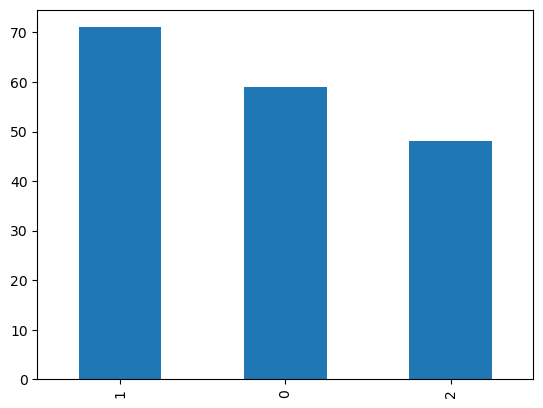

In [47]:
df["target"].value_counts().plot(kind="bar")

In [48]:
df.shape

(178, 14)

In [49]:
X,y=df.drop(["target"],axis=1),df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [50]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=100, cv=5, random_state=100)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [67]:
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Dataset:", round(accuracy*100,2))

Accuracy on Test Dataset: 88.89


In [ ]:

rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
forest = RandomForestClassifier(**best_params)  
forest_accuracy = []
for train_index, _ in rs.split(X_train):
    X_train_subset, y_train_subset = X_train[train_index], y_train[train_index]
    forest.fit(X_train_subset, y_train_subset)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    forest_accuracy.append(accuracy)

print("Accuracy of Random Forest on Test Dataset for each split:", forest_accuracy)
print("Average Accuracy of Random Forest on Test Dataset:", np.mean(forest_accuracy))

